### Data Mining and Machine Learning
### Clustering II.  Hierarchical Clustering
### Edgar Acuna 
### November 2018

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

### 0. Basic Example

In [3]:
x=[3,  4,  6,  7,  8, 10, 15, 18]
y=[ 8,  9, 12, 17, 24, 20, 30, 28]
df=list(zip(x,y))
df=pd.DataFrame(df,columns=['x','y'])
print df

    x   y
0   3   8
1   4   9
2   6  12
3   7  17
4   8  24
5  10  20
6  15  30
7  18  28


In [4]:
dist2=pairwise_distances(df)
Z = hierarchy.linkage(df,'ward')

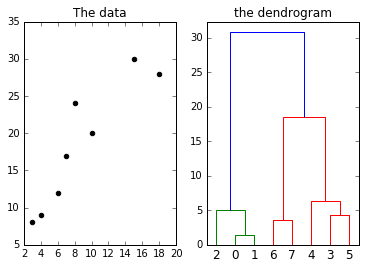

In [5]:
plt.subplot(1, 2, 1)
plt.scatter(x, y,color='k',marker="o")
plt.title('The data')
plt.subplot(1, 2, 2)
plt.title("the dendrogram")
dn = hierarchy.dendrogram(Z)
plt.show()


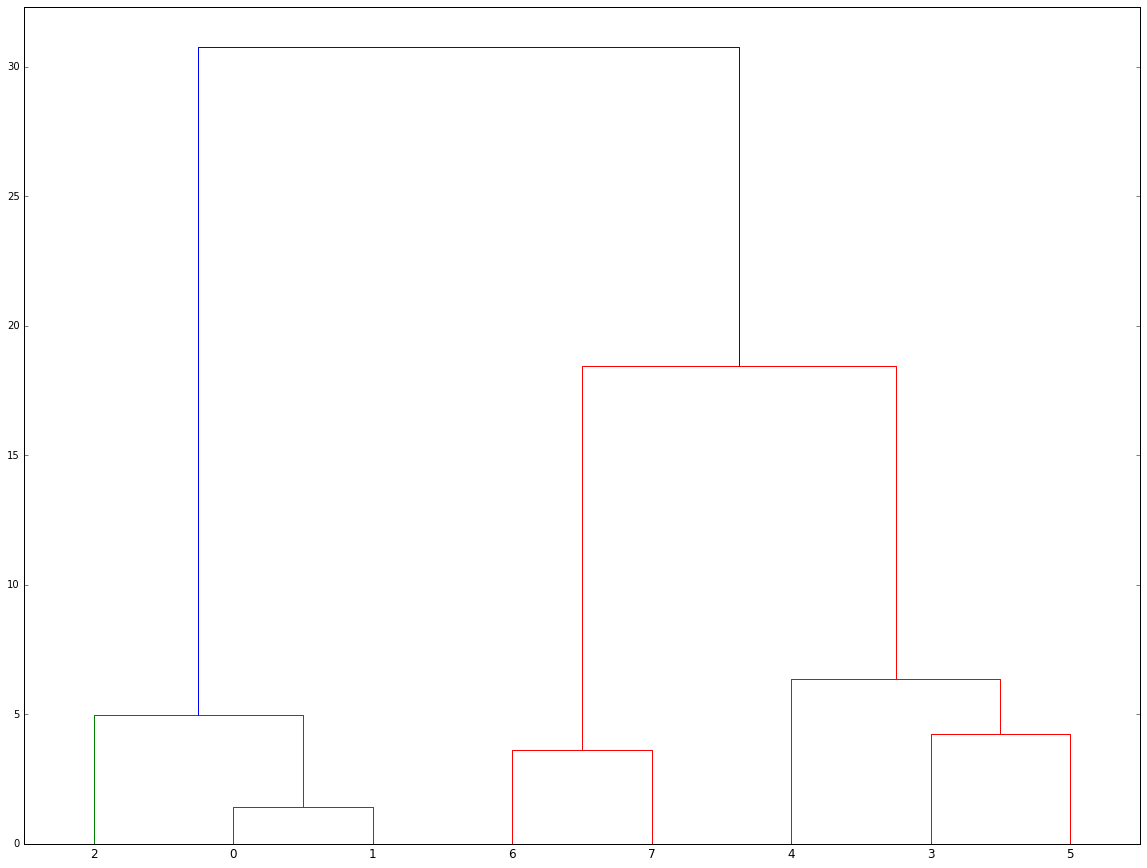

In [6]:
dist2=pairwise_distances(df)
Z = hierarchy.linkage(df,'ward')
plt.figure(figsize=(20,15))
dn = hierarchy.dendrogram(Z)

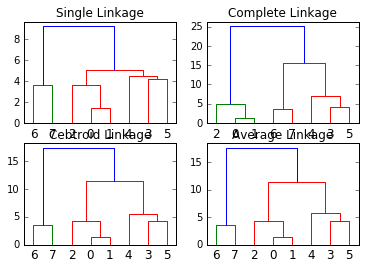

In [7]:
dist2=pairwise_distances(df)
Z1 = hierarchy.linkage(df,'single')
Z2 = hierarchy.linkage(df,'complete')
Z3 = hierarchy.linkage(df,'centroid')
Z4 = hierarchy.linkage(df,'average')
plt.subplot(2, 2, 1)
plt.title("Single Linkage")
dn = hierarchy.dendrogram(Z1)
plt.subplot(2, 2, 2)
plt.title("Complete Linkage")
dn = hierarchy.dendrogram(Z2)
plt.subplot(2, 2, 3)
plt.title("Cebtroid Linkage")
dn = hierarchy.dendrogram(Z3)
plt.subplot(2, 2, 4)
plt.title("Average Linkage")
dn = hierarchy.dendrogram(Z4)

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z = linkage(df, 'ward')
c, coph_dists = cophenet(Z, pdist(df))
print c

0.7082524683269855


###  1.  Dendrogram  for Diabetes

In [9]:
url= "c://PW-PR//diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


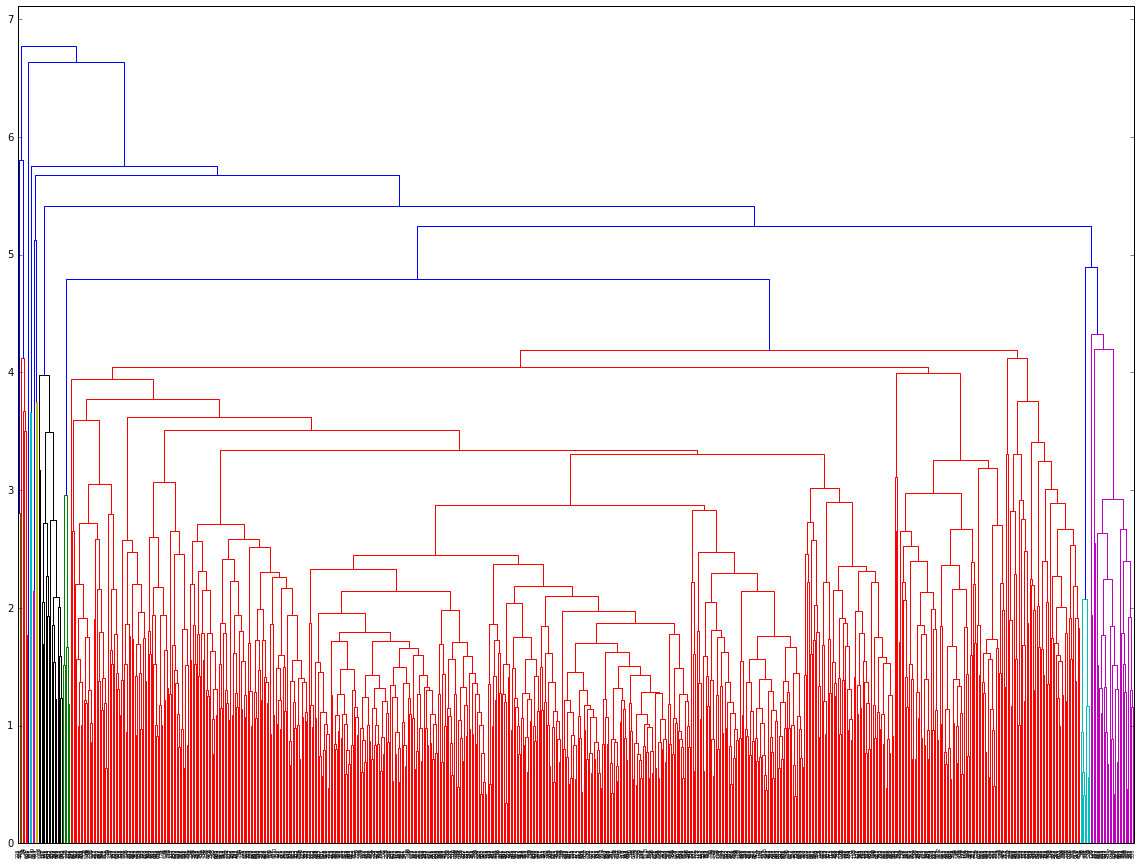

In [10]:
y=data['class']
X=data.iloc[:,0:8]
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X= scaler.transform(X)
dist2=pairwise_distances(X)
Z = hierarchy.linkage(X,'average')
plt.figure(figsize=(20,15))
dn = hierarchy.dendrogram(Z)

### 2. Heatmaps

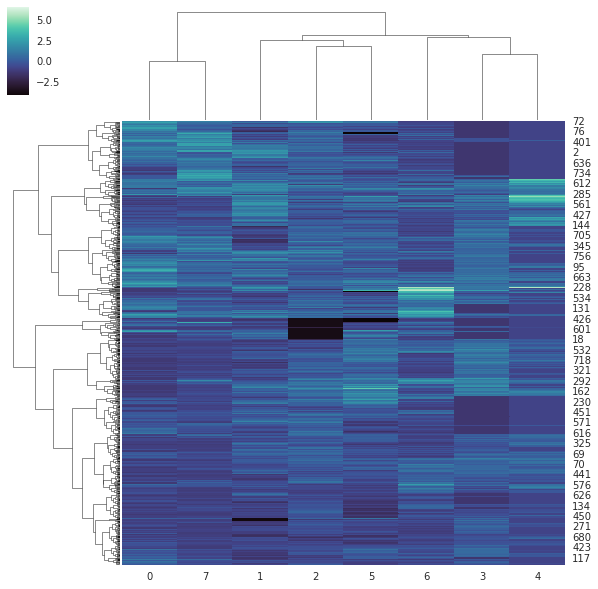

In [11]:
import seaborn as sns
sns.set(color_codes=True)
g = sns.clustermap(X, cmap="mako",method='ward')

### 3 Hierchical Agglomerative Clustering for Diabetes

In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
n_clusters = 2
model = AgglomerativeClustering(n_clusters=n_clusters,linkage="average")
model.fit(X)
clustlabels=model.fit_predict(X)
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Size of the two clusters")
print(np.asarray((unique_elements, counts_elements)))

Size of the two clusters
[[  0   1]
 [761   7]]


In [13]:
pd.crosstab(clustlabels,y)

class,1,2
row_0,,
0,498,263
1,2,5


The  outliers present in diabetes have a great effect  on the  average linkage. We will switch to the Ward linkage

In [14]:
model = AgglomerativeClustering(n_clusters=n_clusters,linkage="ward")
model.fit(X)
clustlabels=model.fit_predict(X)
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Size of gthe two clusters")
print(np.asarray((unique_elements, counts_elements)))

Size of gthe two clusters
[[  0   1]
 [426 342]]


In [15]:
pd.crosstab(clustlabels,y)

class,1,2
row_0,,
0,333,93
1,167,175


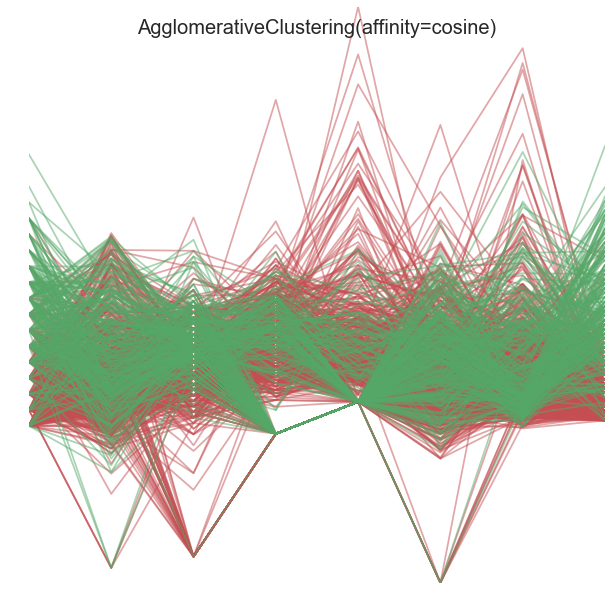

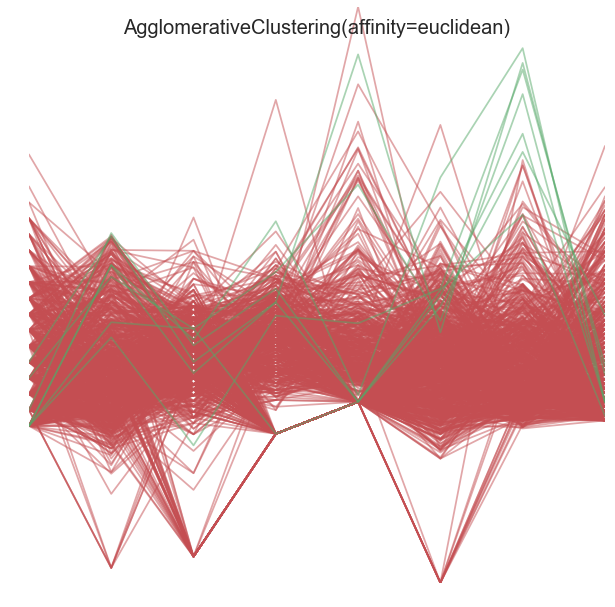

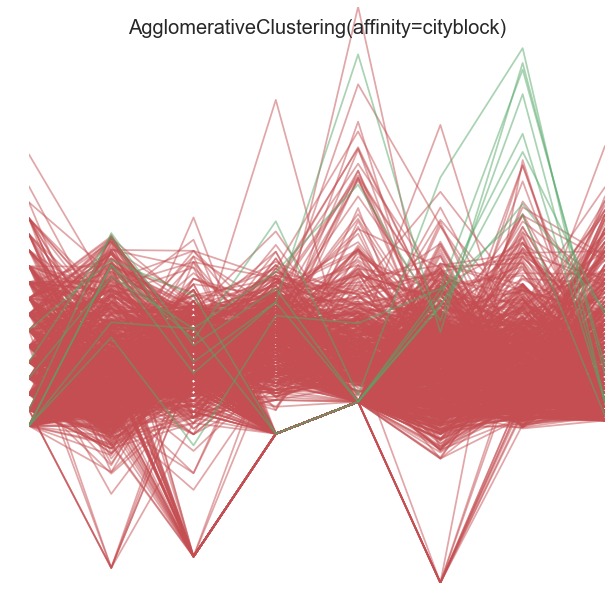

In [16]:
# Plot clustering results
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(n_clusters=n_clusters,linkage="average", affinity=metric)
    model.fit(X)
    plt.figure(figsize=(8,8))
    plt.axes([0, 0, 1, 1])
    for l, c in zip(np.arange(model.n_clusters), 'rgbk'):
        plt.plot(X[model.labels_ == l].T, c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)


plt.show()

### 4. Hierarchical Agglomerative Clustering for Landsat, k=6

In [17]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X= scaler.transform(X)
n_clusters=6
model = AgglomerativeClustering(n_clusters=n_clusters,linkage="ward")
model.fit(X)
clustlabels=model.fit_predict(X)
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Tamano de los seis clusters formados")
print(np.asarray((unique_elements, counts_elements)))

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


Tamano de los seis clusters formados
[[   0    1    2    3    4    5]
 [1053  763  726  998  462  433]]


In [18]:
pd.value_counts(y.values, sort=False)

4     415
1    1072
5     470
2     479
6    1038
3     961
dtype: int64

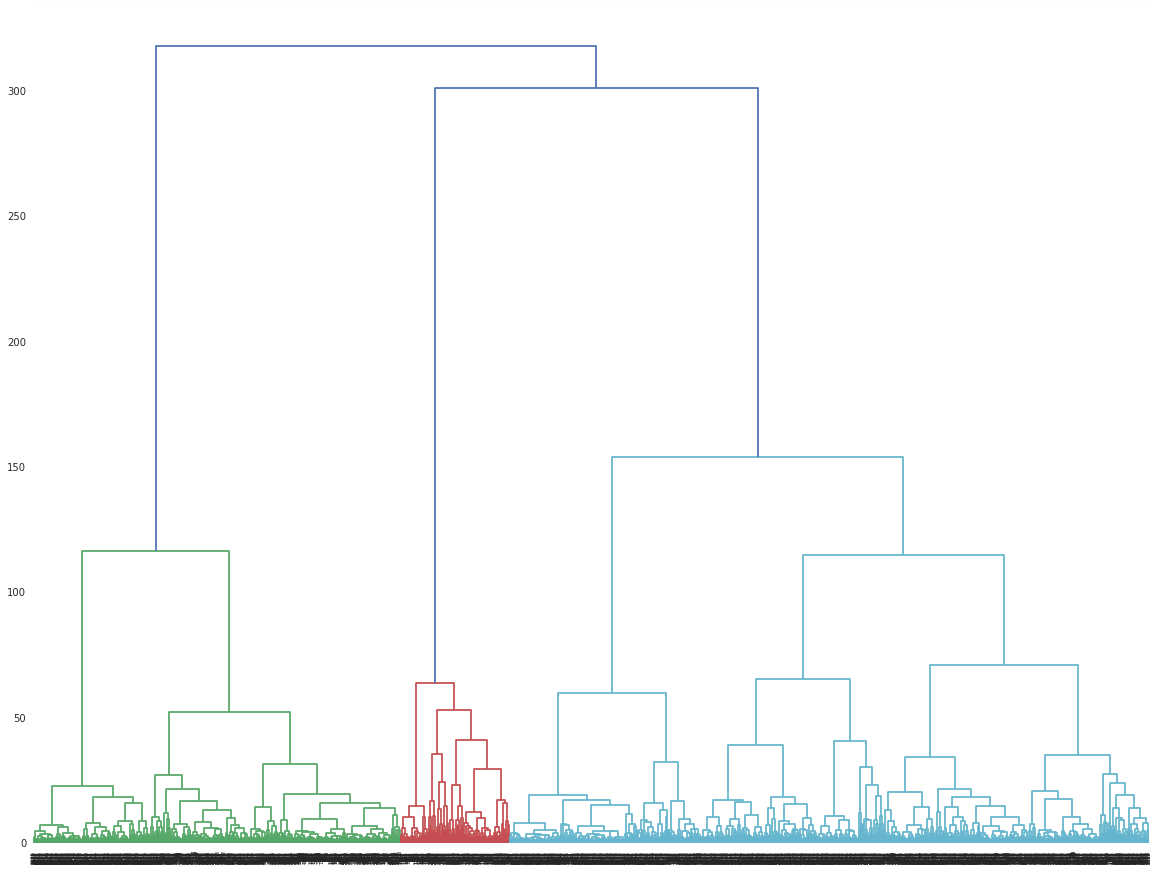

In [19]:
dist2=pairwise_distances(X)
Z = linkage(X,'ward')
plt.figure(figsize=(20,15))
dn = hierarchy.dendrogram(Z)